In [1]:
import numpy as np
import datetime
import glob
import os
import matplotlib.pyplot as plt
import cartopy
from matplotlib import gridspec
import itertools
import cartopy.crs as ccrs
import tqdm
import netCDF4 as nc 
from scipy.stats import linregress
from pyproj import Proj, Transformer
from scipy.interpolate import griddata

import warnings
import pickle
warnings.filterwarnings("ignore")


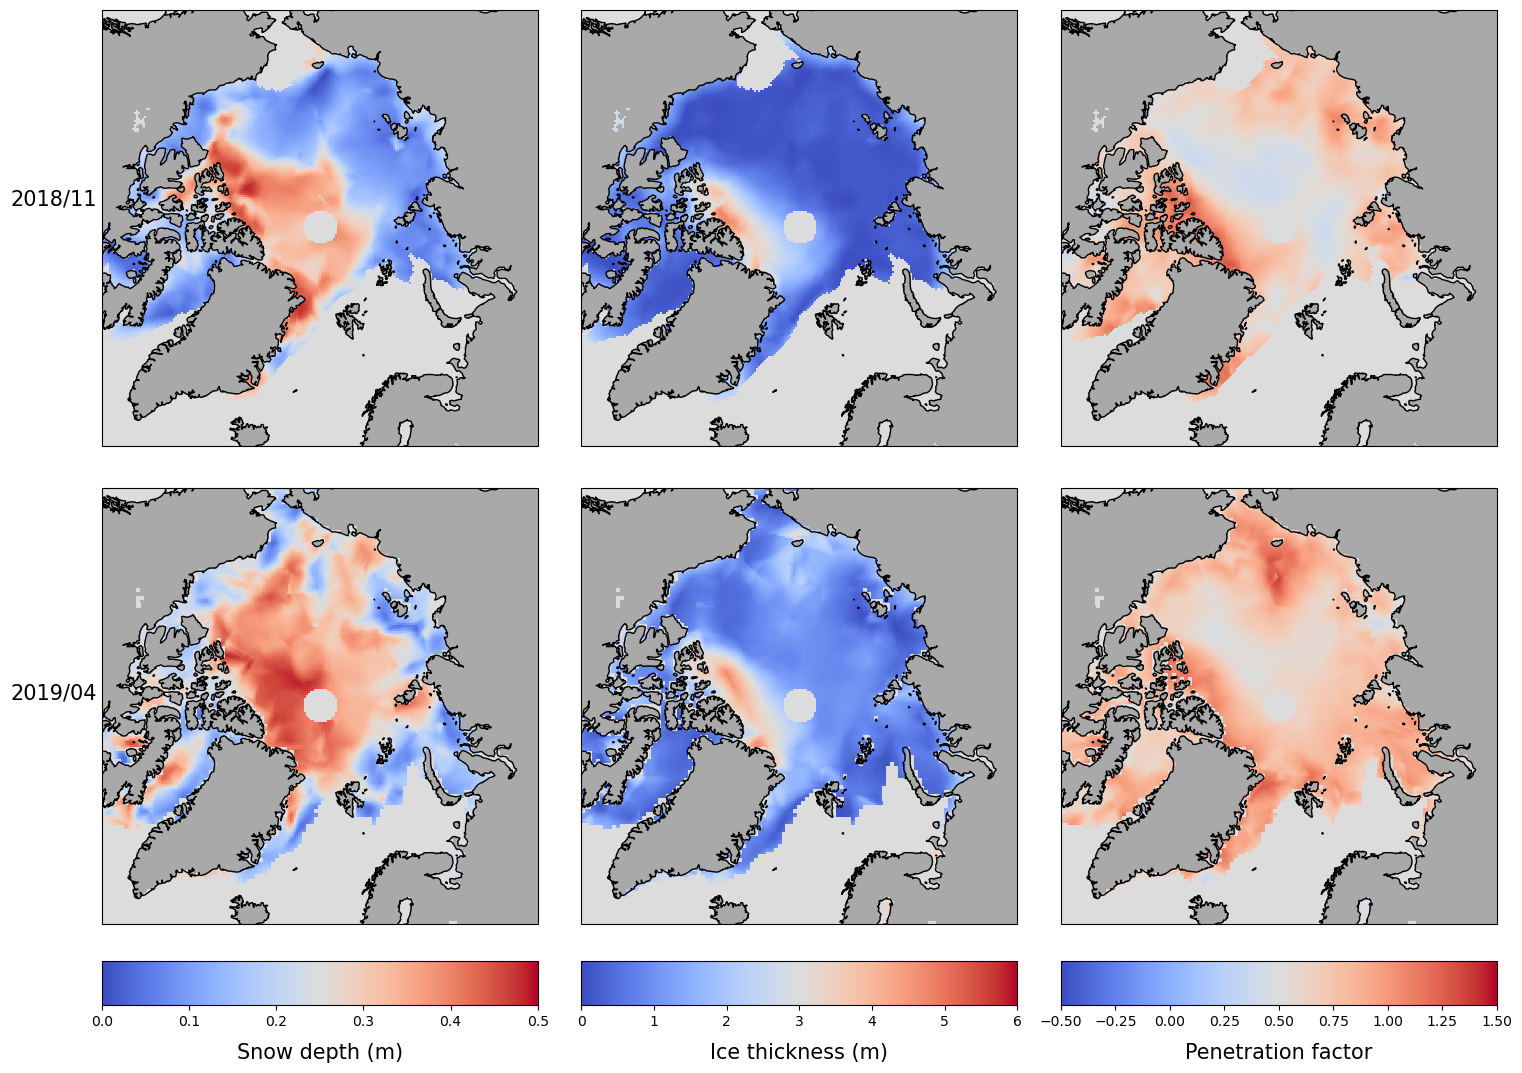

In [2]:
# change these according to date
snow_april = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201904/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_snow.npy")
ice_april = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201904/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_ice.npy")
cs_april = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201904/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_penetration.npy")

snow_nov = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201811/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_snow.npy")
ice_nov = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201811/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_ice.npy")
cs_nov = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201811/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_penetration.npy")



lon_g = np.load("/home/erb/masterproject/MSCI_project/new_lon_25km.npy")
lat_g = np.load("/home/erb/masterproject/MSCI_project/new_lat_25km.npy")


fig = plt.figure(figsize = (18,13))
spec = gridspec.GridSpec(ncols=3, nrows=3,wspace=0.1,hspace=0.1,height_ratios= [1, 1, 0.1])

ax1 = fig.add_subplot(spec[0], projection=ccrs.NorthPolarStereo())
ax1.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax1.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax1.coastlines()
ax1.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map = ax1.pcolormesh(lon_g,lat_g, snow_nov,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 0.5)


ax2 = fig.add_subplot(spec[1],projection=ccrs.NorthPolarStereo())
ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax2.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax2.coastlines()
ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map = ax2.pcolormesh(lon_g,lat_g, ice_nov,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 6)

ax2 = fig.add_subplot(spec[2],projection=ccrs.NorthPolarStereo())
ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax2.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax2.coastlines()
ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map = ax2.pcolormesh(lon_g,lat_g, cs_nov,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = -0.5, vmax = 1.5)

ax1 = fig.add_subplot(spec[3], projection=ccrs.NorthPolarStereo())
ax1.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax1.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax1.coastlines()
ax1.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map_snow = ax1.pcolormesh(lon_g,lat_g, snow_april,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 0.5)


ax2 = fig.add_subplot(spec[4],projection=ccrs.NorthPolarStereo())
ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax2.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax2.coastlines()
ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map_ice = ax2.pcolormesh(lon_g,lat_g, ice_april,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 6)

ax2 = fig.add_subplot(spec[5],projection=ccrs.NorthPolarStereo())
ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax2.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax2.coastlines()
ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map_penetration = ax2.pcolormesh(lon_g,lat_g, cs_april,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = -0.5, vmax = 1.5)


cax = fig.add_subplot(spec[6])
fig.colorbar(p_map_snow, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('bottom')
cax.set_xlabel('Snow depth (m)', labelpad = 10, fontsize = 15)
cax.xaxis.set_label_position('bottom')

cax = fig.add_subplot(spec[7])
fig.colorbar(p_map_ice, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('bottom')
cax.set_xlabel('Ice thickness (m)', labelpad = 10, fontsize = 15)
cax.xaxis.set_label_position('bottom')


cax = fig.add_subplot(spec[8])
fig.colorbar(p_map_penetration, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('bottom')
cax.set_xlabel('Penetration factor', labelpad = 10, fontsize = 15)
cax.xaxis.set_label_position('bottom')



date = ["2018/11", "2019/04"]

fig.text(0.098, 0.73, date[0], va='center', ha='center', fontsize=15)
fig.text(0.098, 0.35, date[1], va='center', ha='center', fontsize=15)



plt.show()